# Data Analysis
---

### Import Libraries

In [25]:
import os
import warnings
import operator 

import datetime as dt

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 

from importlib import reload

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 180

### Retrieve Data

In [26]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

In [27]:
print('List of stocks: ', end = ' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks:  TSLA 

### Ticker

In [28]:
ticker = 'tsla'

In [29]:
stocks[ticker].tail()

,High,Low,Open,Close,Volume,Adj Close,Return,Change,Volatility,MA7,MA21,Momentum,RSI,MACD,Signal,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,
2022-03-04,855.650024,825.159973,849.099976,838.289978,22333200.0,838.289978,-0.013,-1.000000,94.699439,843.272853,870.654285,861.369995,NaN,-29.150511,-33.491684,962.766096,778.542474
2022-03-07,866.140015,804.570007,856.299988,804.580017,24164700.0,804.580017,-0.060,-33.709961,95.242887,843.817139,866.532381,876.890015,NaN,-30.866360,-32.966619,962.461813,770.602948
2022-03-08,849.989990,782.169983,795.530029,824.400024,26799700.0,824.400024,0.036,19.820007,94.665476,845.892857,861.821905,836.289978,NaN,-30.277849,-32.428865,955.733162,767.910648
2022-03-09,860.559998,832.010010,839.479980,858.969971,19672600.0,858.969971,0.023,34.569946,92.957422,844.255711,859.518569,835.289978,NaN,-26.714002,-31.285893,951.084330,767.952808
2022-03-10,854.450012,810.530029,851.450012,838.299988,19255074.0,838.299988,-0.015,-20.669983,91.782127,840.531424,855.532854,801.580017,NaN,-25.266269,-30.081968,942.864564,768.201145


---
# Check for Correlation
---

In [30]:
stocks[ticker].corr()[['Return']].sort_values(by='Return', ascending=False)[:5]

,Return
Return,1.000000
Change,0.428358
RSI,0.056276
Volume,0.042162
MACD,0.034091


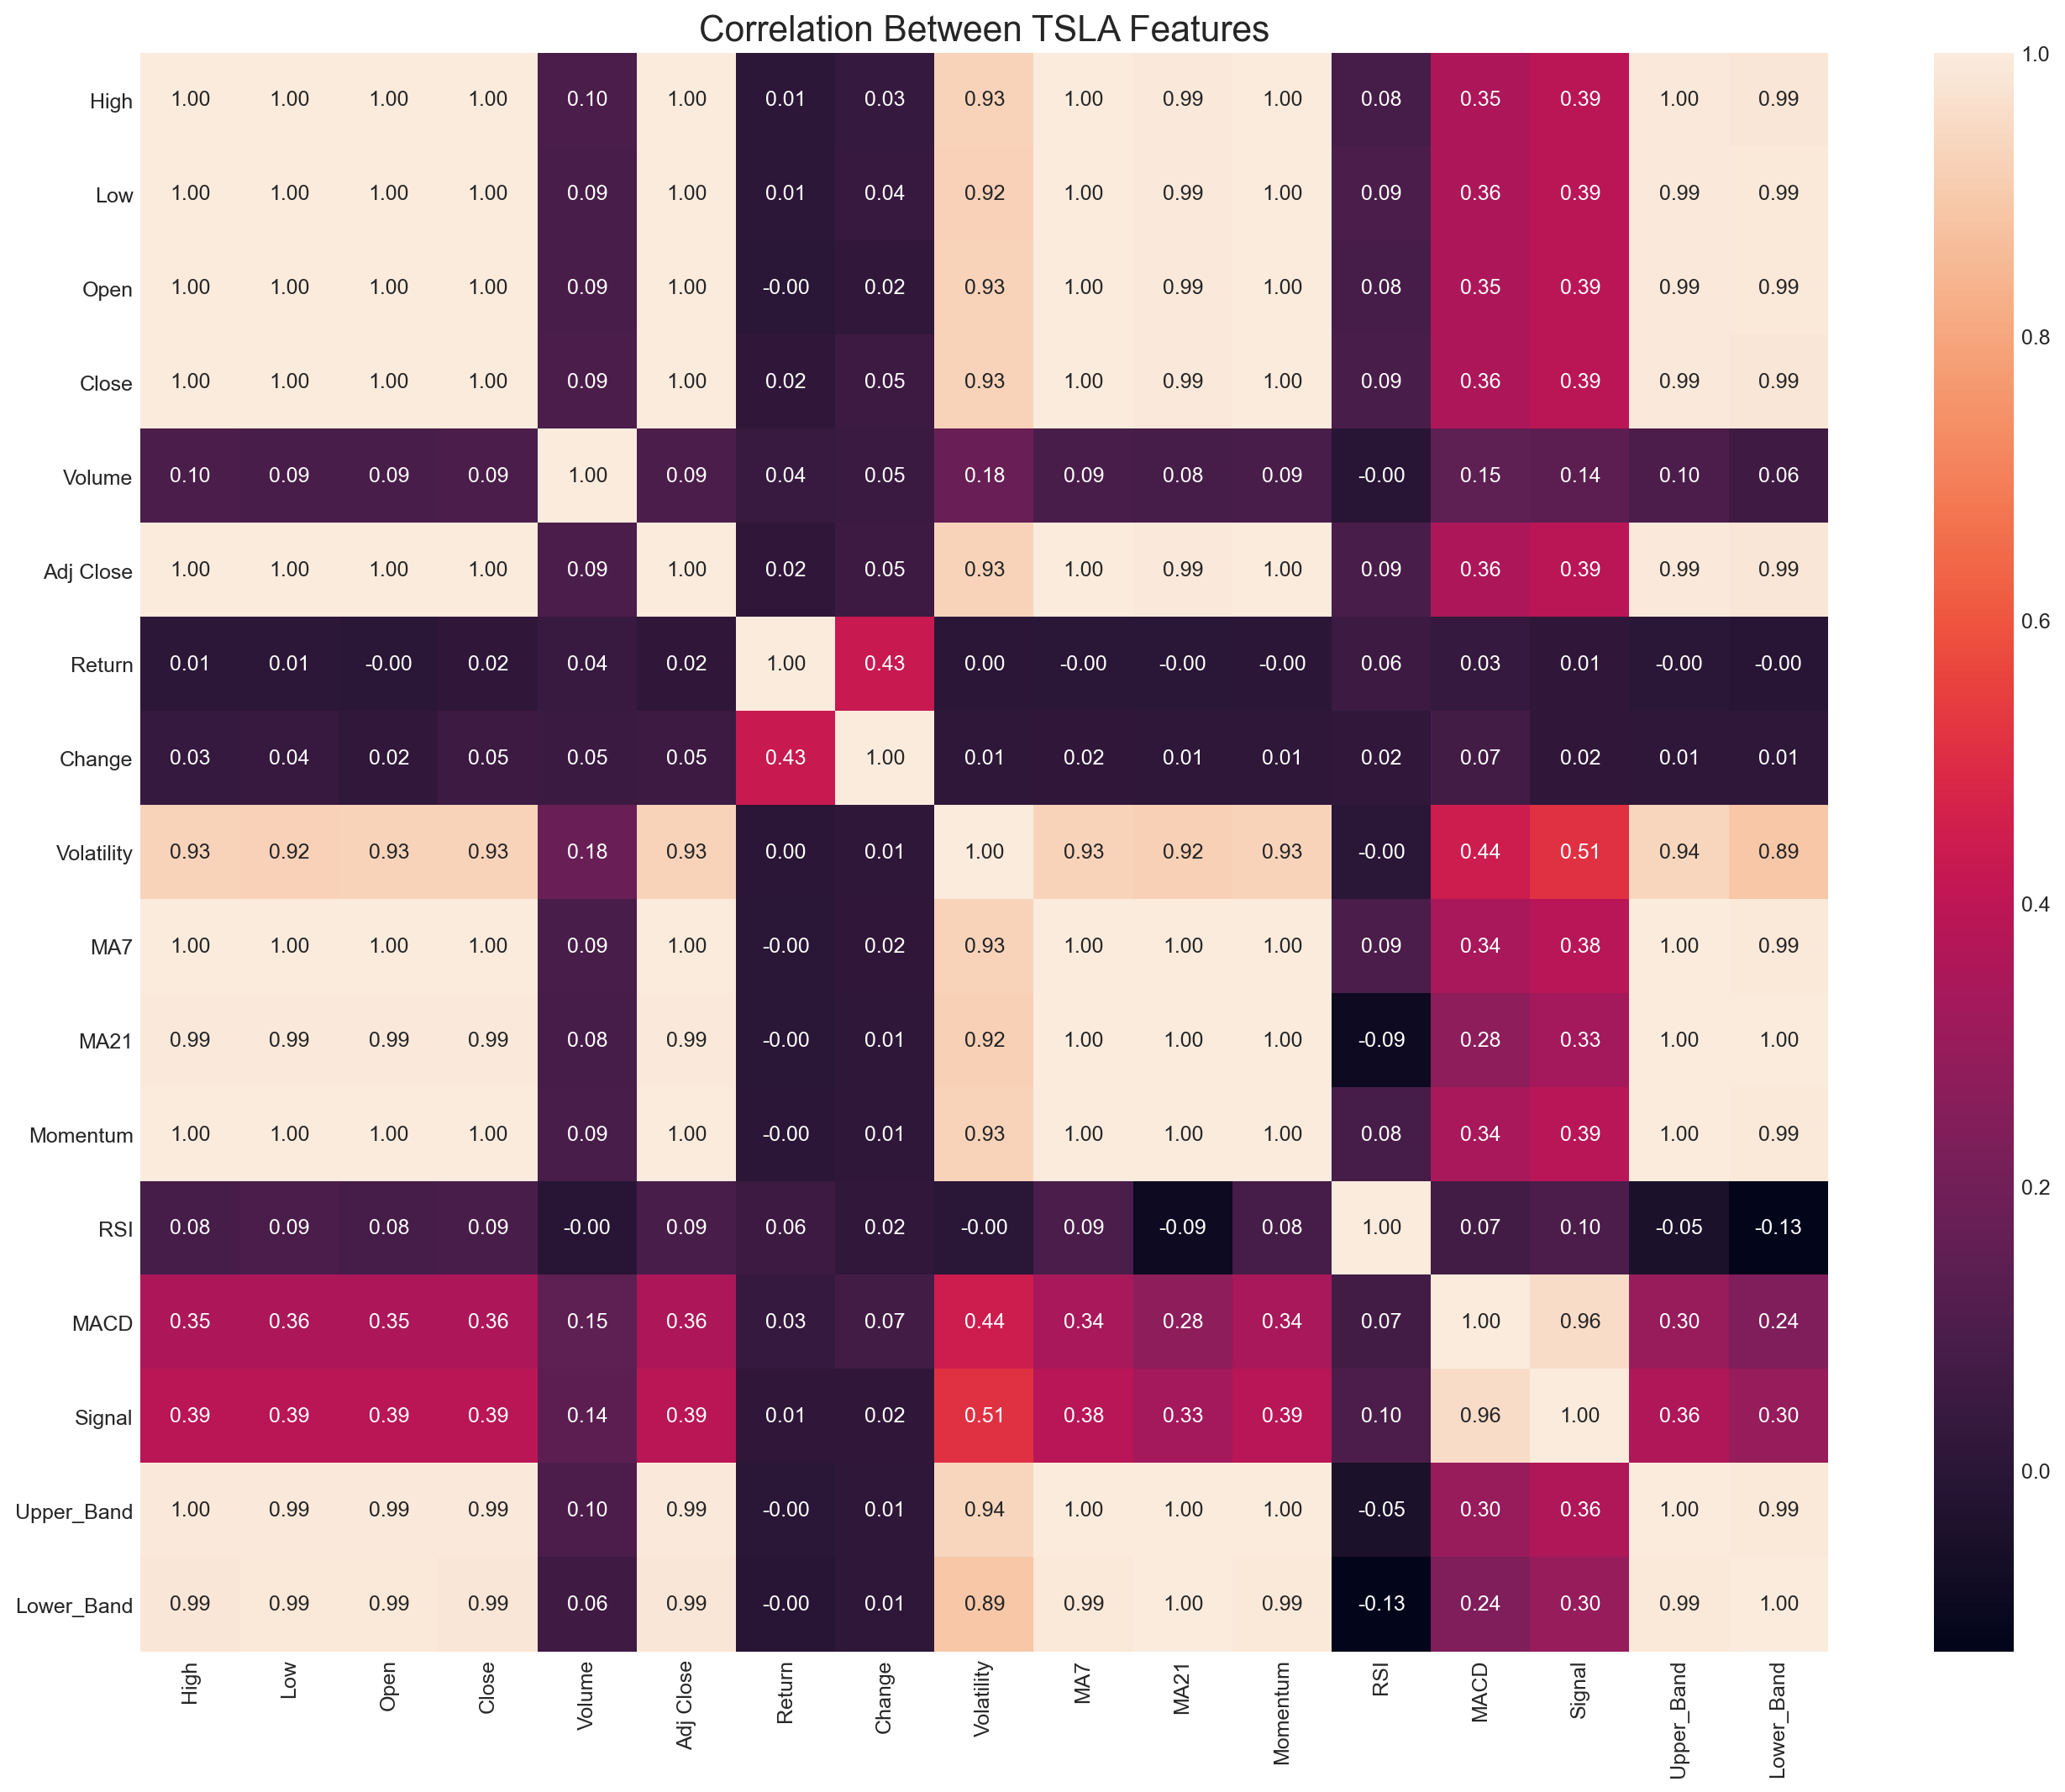

In [31]:
plt.figure(figsize=(18,14))
sns.heatmap(stocks[ticker].corr(), annot=True, fmt='.2f')
plt.ylim(17,0)
plt.title('Correlation Between '+ticker.upper()+' Features', fontSize=17)
plt.show();

---
# Chart Colors
---

In [35]:
Blue = '#3388cf'
Purple = '#ad6eff'
Red = '#ff6e9d'
Green = '#60e8ad'
Dark_Orange = '#ffbd74'
Light_Orange = '#ffa33f'
Fill_Orange = '#ffa33f'

---
# Bollinger Bands
---

In [33]:
std = 2
xend = dt.date(2020,12,31)
xstart = dt.date(2020,1,1)

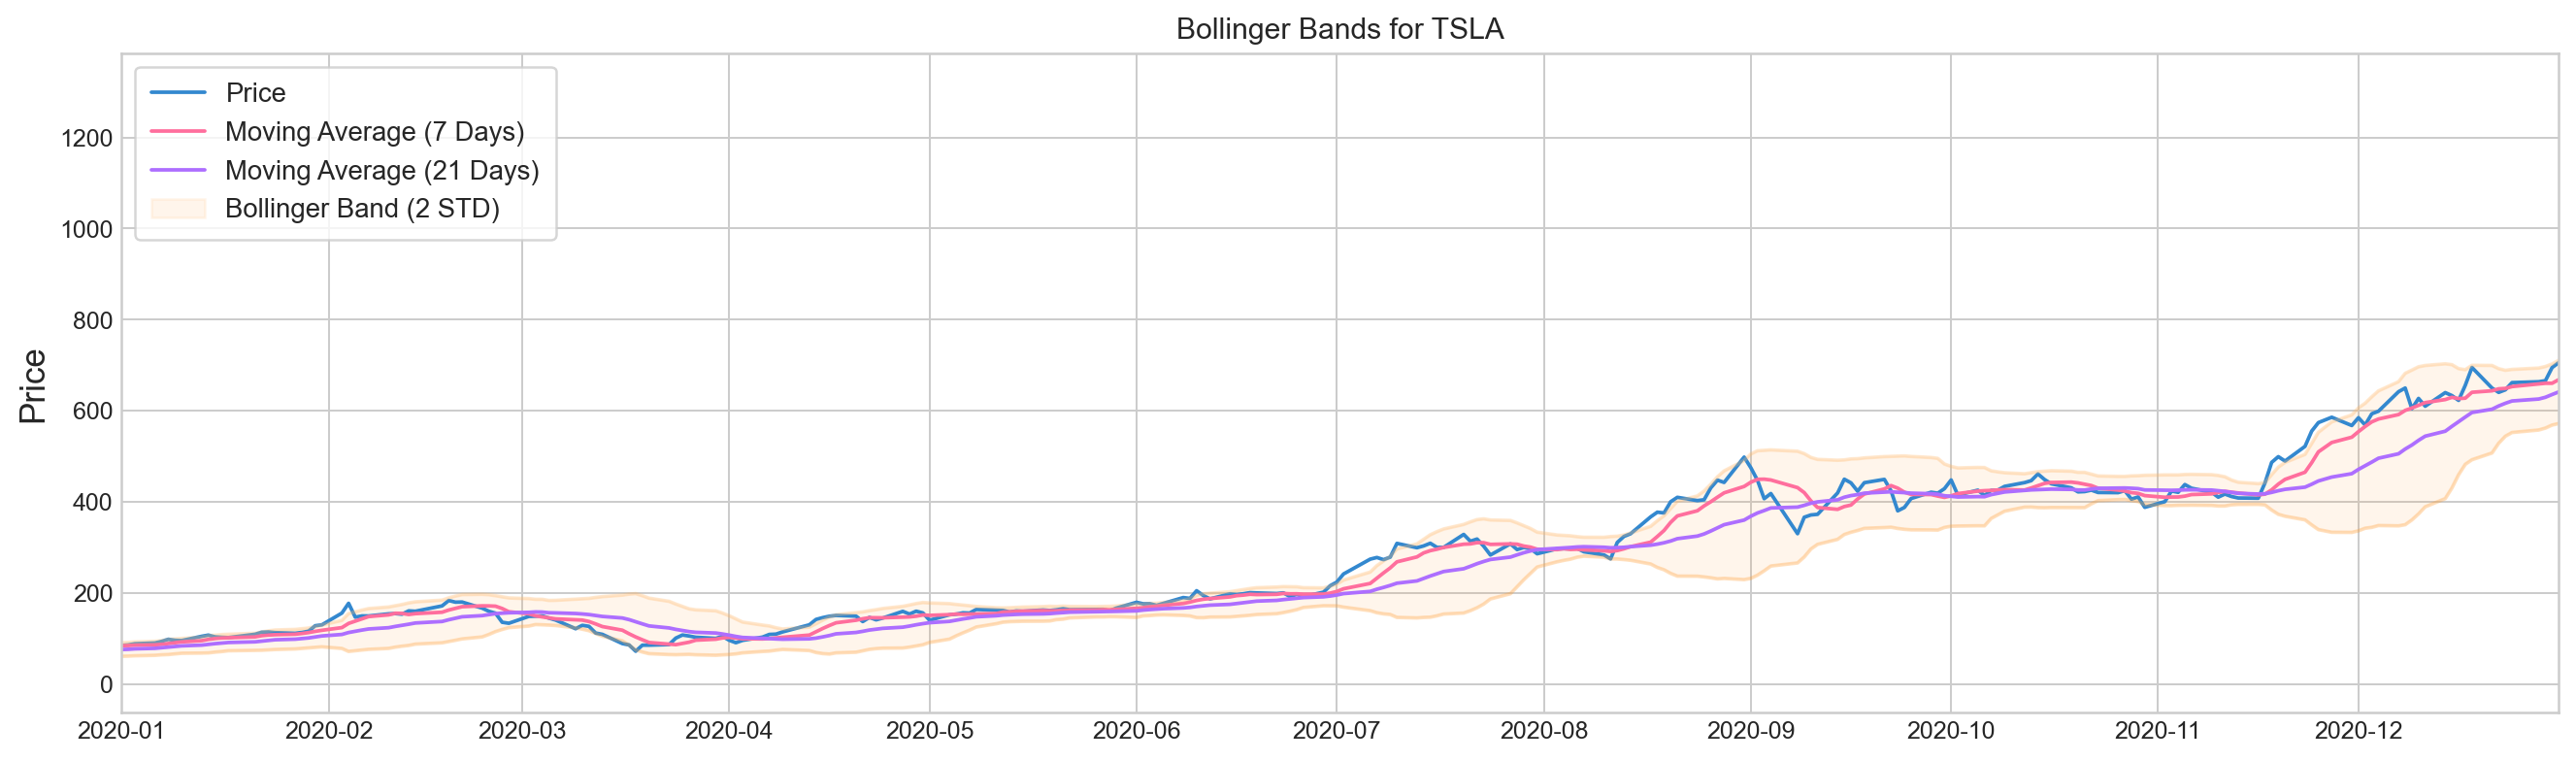

In [34]:
plt.figure(figsize=(18,5))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker].index, stocks[ticker].Close, color=Blue, label = 'Price')
plt.plot(stocks[ticker].index, stocks[ticker].MA7, color=Red, label = 'Moving Average (7 Days)')
plt.plot(stocks[ticker].index, stocks[ticker].MA21, color=Purple, label = 'Moving Average (21 Days)')

plt.plot(stocks[ticker].index, stocks[ticker].Upper_Band, color=Dark_Orange, alpha=0.3)
plt.plot(stocks[ticker].index, stocks[ticker].Lower_Band, color=Light_Orange, alpha=0.3)
plt.fill_between(stocks[ticker].index, stocks[ticker].Upper_Band, stocks[ticker].Lower_Band, color=Light_Orange, alpha=0.1, label='Bollinger Band ({} STD)'.format(std))

plt.legend(frameon=True,loc=2, ncol=1, fontsize=11, borderpad=.6)
plt.title('Bollinger Bands for '+ticker.upper())
plt.ylabel('Price', fontsize=14)
plt.xlim([xstart,xend])
plt.show();

---
# Relative Strength Index (RSI)
---

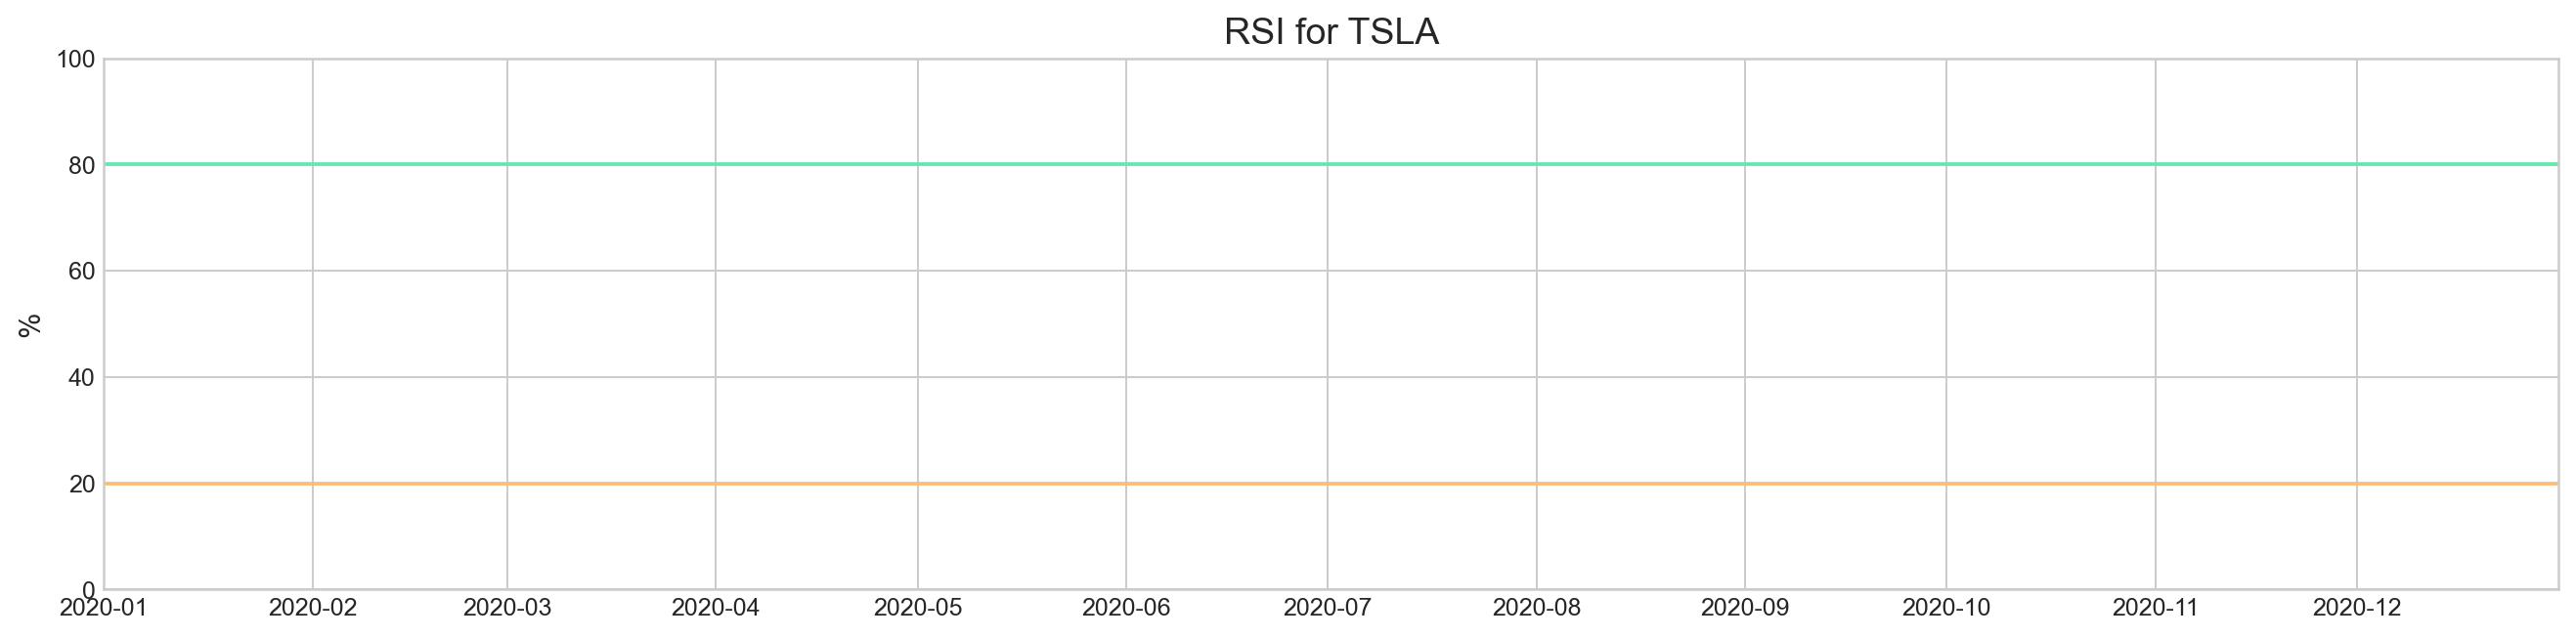

In [41]:
plt.figure(figsize=(18,4))

plt.plot(stocks[ticker].index, stocks[ticker].RSI, color=Purple)

plt.xlim([xstart,xend])
plt.ylim([0,100])
plt.axhline(20, color=Dark_Orange)
plt.axhline(80, color=Green)

plt.title('RSI for '+ticker.upper(),fontsize=15)
plt.ylabel('%', fontsize=12)
plt.show();

---
# Moving Average Convergence/Divergence (MACD)
---